# Using CNN2D to train MNIST dataset

/opt/homebrew/Caskroom/miniconda/base/envs/113_DeepLearning/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-20 20:20:37.750987: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-10-20 20:20:37.751009: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-20 20:20:37.751017: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-20 20:20:37.751055: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-20 20:20:37.751067: I tensorflow/core/common_runtime/plugga

Epoch 1/5


2024-10-20 20:20:38.594336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8489 - loss: 0.4917 - val_accuracy: 0.9803 - val_loss: 0.0695
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9808 - loss: 0.0612 - val_accuracy: 0.9860 - val_loss: 0.0485
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9874 - loss: 0.0399 - val_accuracy: 0.9839 - val_loss: 0.0519
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9890 - val_loss: 0.0369
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9936 - loss: 0.0197 - val_accuracy: 0.9887 - val_loss: 0.0374
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9878 - loss: 0.0397
Test accuracy: 0.991100013256073


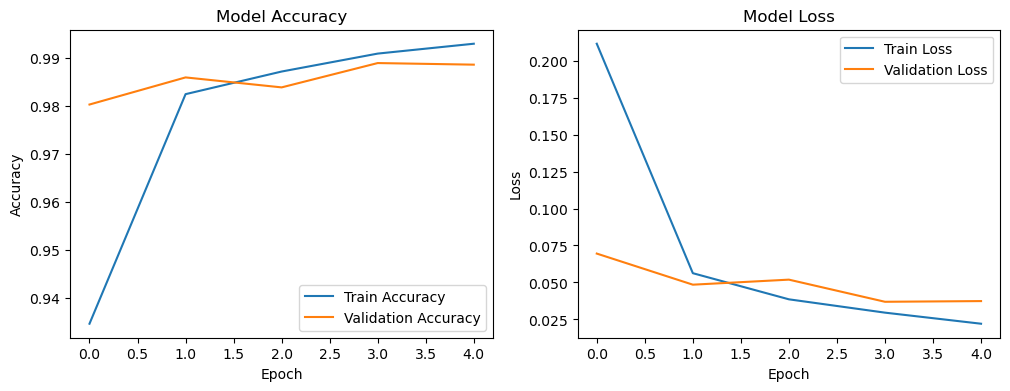

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the dataset to add the channel dimension (since the images are grayscale, we add one channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Step 2: Define the 2D CNN model
model = models.Sequential()

# First convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max pooling layer with pool size 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers to feed into the fully connected layers
model.add(layers.Flatten())

# Add a dense fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (for 10 classes) and softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Step 3: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 5: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Step 6: Plot the training history (accuracy and loss)
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the function to plot the training history
plot_training_history(history)


## Train MNIST Dataset Using 2D CNN (Functional API)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8482 - loss: 0.4949 - val_accuracy: 0.9781 - val_loss: 0.0729
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9802 - loss: 0.0636 - val_accuracy: 0.9823 - val_loss: 0.0536
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9867 - loss: 0.0419 - val_accuracy: 0.9872 - val_loss: 0.0434
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9891 - loss: 0.0318 - val_accuracy: 0.9872 - val_loss: 0.0461
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9924 - loss: 0.0232 - val_accuracy: 0.9860 - val_loss: 0.0506
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9841 - loss: 0.0496
Test accuracy: 0.9876000285148621


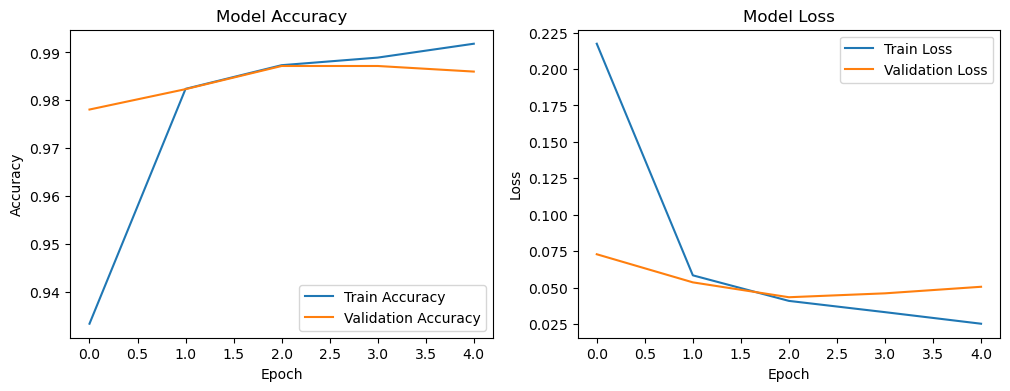

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the dataset to add the channel dimension (since the images are grayscale, we add one channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Step 2: Define the 2D CNN model using Functional API
# Input layer
inputs = layers.Input(shape=(28, 28, 1))

# First convolutional layer
conv1 = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool1 = layers.MaxPooling2D((2, 2))(conv1)

# Second convolutional layer
conv2 = layers.Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = layers.MaxPooling2D((2, 2))(conv2)

# Third convolutional layer
conv3 = layers.Conv2D(64, (3, 3), activation='relu')(pool2)

# Flatten the output from the convolutional layers
flatten = layers.Flatten()(conv3)

# Fully connected (dense) layer
dense = layers.Dense(64, activation='relu')(flatten)

# Output layer with 10 units (for 10 classes) and softmax activation
outputs = layers.Dense(10, activation='softmax')(dense)

# Step 3: Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Step 4: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Step 7: Plot the training history (accuracy and loss)
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the function to plot the training history
plot_training_history(history)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8471 - loss: 0.4836 - val_accuracy: 0.9778 - val_loss: 0.0766
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9805 - loss: 0.0601 - val_accuracy: 0.9833 - val_loss: 0.0589
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9851 - val_loss: 0.0469
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9902 - loss: 0.0301 - val_accuracy: 0.9883 - val_loss: 0.0427
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9937 - loss: 0.0223 - val_accuracy: 0.9881 - val_loss: 0.0415
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9855 - loss: 0.0405
Test accuracy: 0.9890000224113464


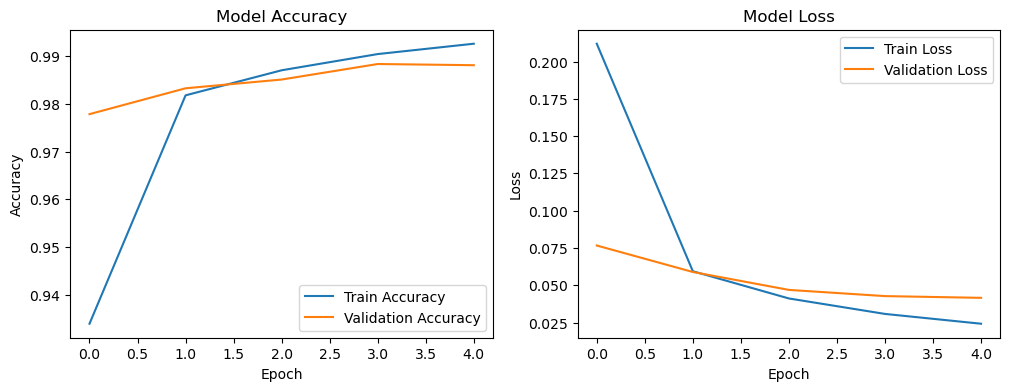

Model and weights saved successfully!


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the dataset to add the channel dimension (since the images are grayscale, we add one channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Step 2: Define the 2D CNN model using Functional API
# Input layer
inputs = layers.Input(shape=(28, 28, 1))

# First convolutional layer
conv1 = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool1 = layers.MaxPooling2D((2, 2))(conv1)

# Second convolutional layer
conv2 = layers.Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = layers.MaxPooling2D((2, 2))(conv2)

# Third convolutional layer
conv3 = layers.Conv2D(64, (3, 3), activation='relu')(pool2)

# Flatten the output from the convolutional layers
flatten = layers.Flatten()(conv3)

# Fully connected (dense) layer
dense = layers.Dense(64, activation='relu')(flatten)

# Output layer with 10 units (for 10 classes) and softmax activation
outputs = layers.Dense(10, activation='softmax')(dense)

# Step 3: Create the model
model = models.Model(inputs=inputs, outputs=outputs)

# Step 4: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Step 7: Plot the training history (accuracy and loss)
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Step 8: Save the entire model for deployment using the Keras format
model.save('my_trained_model.keras')  # Use '.keras' extension for the new format

# Save only the model's weights using the .h5 format (required for weights)
model.save_weights('my_trained_model.weights.h5')  # Use .h5 for saving weights

print("Model and weights saved successfully!")


## Load saved model and corresponding weights

In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model architecture from the .keras file
model = load_model('my_trained_model.keras')

# Load the weights from the .h5 file into the model
model.load_weights('my_trained_model.weights.h5')

# Function to load and preprocess an image
def load_and_preprocess_image(img_path, target_size):
    # Load the image
    img = image.load_img(img_path, target_size=target_size, color_mode='grayscale')
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand the dimensions to match the model input (batch_size, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image (optional based on your model's preprocessing)
    img_array /= 255.0  # Assuming the model was trained with normalization to [0, 1]
    
    return img_array

# Path to the unseen image
unseen_imgs = ['digit_0.png', 'digit_1.png', 'digit_1-1.png', 'digit_4.png', 'digit_6.png', 'digit_6-1.png', 'digit_8.png']
for i in range(len(unseen_imgs)):
    unseen_image_path = f'imgs/{unseen_imgs[i]}'  # Replace with the actual path to your unseen image

    # Modify target_size to match model's expected input size (28, 28) for grayscale images
    preprocessed_image = load_and_preprocess_image(unseen_image_path, target_size=(28, 28))

    # Use the model to make a prediction
    prediction = model.predict(preprocessed_image)

    # Process the prediction (e.g., if it's a classification, you might want to get the class with the highest probability)
    predicted_class = np.argmax(prediction, axis=-1)
    print(f"The model predicts that image {unseen_imgs[i]} is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
The model predicts that image digit_0.png is: [6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
The model predicts that image digit_1.png is: [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The model predicts that image digit_1-1.png is: [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The model predicts that image digit_4.png is: [6]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
The model predicts that image digit_6.png is: [1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
The model predicts that image digit_6-1.png is: [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
The model predicts that image digit_8.png is: [0]


## Train MNIST Dataset Using 2D CNN (PyTorch)

Epoch [1/5], Loss: 0.1611, Accuracy: 95.02%
Epoch [2/5], Loss: 0.0449, Accuracy: 98.59%
Epoch [3/5], Loss: 0.0300, Accuracy: 99.09%
Epoch [4/5], Loss: 0.0227, Accuracy: 99.26%
Epoch [5/5], Loss: 0.0173, Accuracy: 99.44%
Test Accuracy: 99.08%


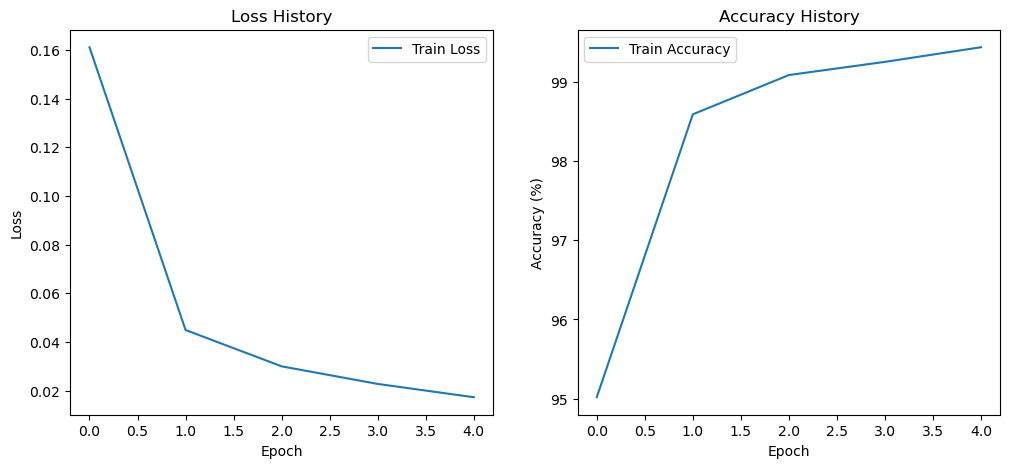

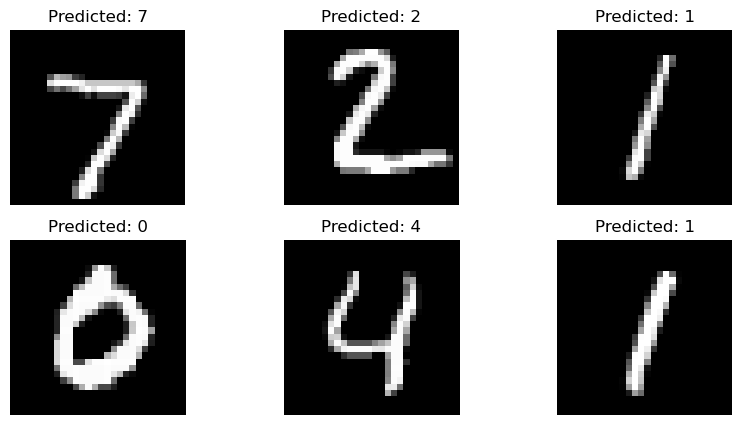

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset

# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images to [-1, 1] range
])

# Download and load the MNIST training and test sets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders to help iterate through the dataset in mini-batches
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Step 2: Define the 2D CNN model using PyTorch

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # First convolutional layer: 1 input channel (grayscale), 32 output channels, 3x3 kernel size
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Second convolutional layer: 32 input channels, 64 output channels, 3x3 kernel size
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Max pooling layer (2x2 window)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layer (dense layer)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 7x7 is the size after max pooling
        self.fc2 = nn.Linear(128, 10)  # Output layer: 10 classes (digits 0-9)
        
        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # First convolution, ReLU, and pooling
        x = self.pool(self.relu(self.conv1(x)))
        
        # Second convolution, ReLU, and pooling
        x = self.pool(self.relu(self.conv2(x)))
        
        # Flatten the output for the fully connected layer
        x = x.view(-1, 64 * 7 * 7)
        
        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer with logits
        
        return x

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Step 3: Train the model

def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()  # Set model to training mode
    train_loss_history = []
    train_acc_history = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (images, labels) in enumerate(train_loader):
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Track accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            running_loss += loss.item()

        # Calculate average loss and accuracy
        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total
        
        train_loss_history.append(avg_loss)
        train_acc_history.append(accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return train_loss_history, train_acc_history

# Step 4: Evaluate the model

def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation for evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Step 5: Plot accuracy and loss history
def plot_training_history(loss_history, acc_history):
    plt.figure(figsize=(12, 5))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label='Train Loss')
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(acc_history, label='Train Accuracy')
    plt.title('Accuracy History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

# Step 6: Call the training and evaluation functions
train_loss_history, train_acc_history = train_model(model, train_loader, criterion, optimizer, num_epochs=5)
evaluate_model(model, test_loader)

# Step 7: Plot accuracy and loss history after training
plot_training_history(train_loss_history, train_acc_history)

# Step 8: Plot a few test images and predictions
def show_test_predictions(model, test_loader):
    model.eval()  # Set model to evaluation mode
    images, labels = next(iter(test_loader))  # Get a batch of test images
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    # Plot the first 6 test images and their predicted labels
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Predicted: {predicted[i].item()}')
        plt.axis('off')
    plt.show()

# Show test predictions
show_test_predictions(model, test_loader)


## Saving the Model Parameters and Weights

Epoch [1/5], Loss: 0.1509, Accuracy: 95.30%
Epoch [2/5], Loss: 0.0455, Accuracy: 98.58%
Epoch [3/5], Loss: 0.0314, Accuracy: 98.99%
Epoch [4/5], Loss: 0.0223, Accuracy: 99.27%
Epoch [5/5], Loss: 0.0174, Accuracy: 99.44%
Test Accuracy: 98.72%


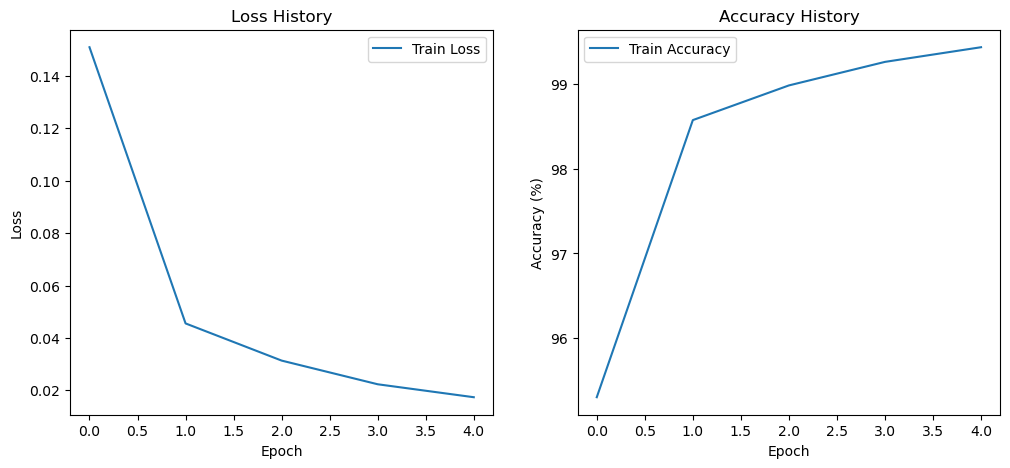

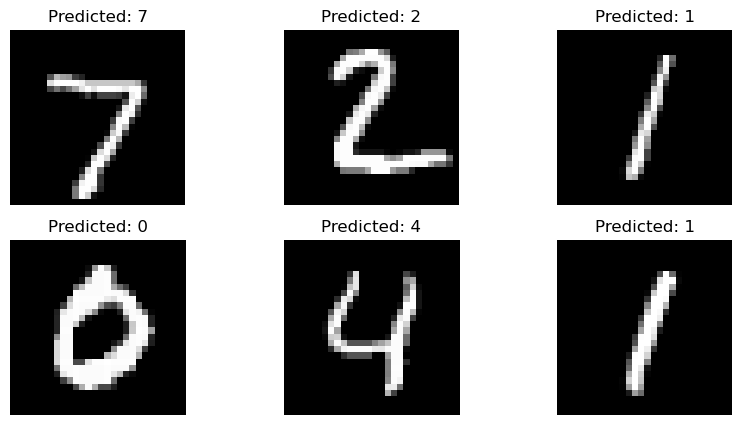

Model saved to cnn_mnist_model.pth


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset

# Define transformations for the training and test sets
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images to [-1, 1] range
])

# Download and load the MNIST training and test sets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders to help iterate through the dataset in mini-batches
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Step 2: Define the 2D CNN model using PyTorch

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # First convolutional layer: 1 input channel (grayscale), 32 output channels, 3x3 kernel size
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Second convolutional layer: 32 input channels, 64 output channels, 3x3 kernel size
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        
        # Max pooling layer (2x2 window)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Fully connected layer (dense layer)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 7x7 is the size after max pooling
        self.fc2 = nn.Linear(128, 10)  # Output layer: 10 classes (digits 0-9)
        
        # ReLU activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # First convolution, ReLU, and pooling
        x = self.pool(self.relu(self.conv1(x)))
        
        # Second convolution, ReLU, and pooling
        x = self.pool(self.relu(self.conv2(x)))
        
        # Flatten the output for the fully connected layer
        x = x.view(-1, 64 * 7 * 7)
        
        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.fc2(x)  # Output layer with logits
        
        return x

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Step 3: Train the model

def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()  # Set model to training mode
    train_loss_history = []
    train_acc_history = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (images, labels) in enumerate(train_loader):
            # Zero the gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            # Track accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            running_loss += loss.item()

        # Calculate average loss and accuracy
        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total
        
        train_loss_history.append(avg_loss)
        train_acc_history.append(accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return train_loss_history, train_acc_history

# Step 4: Evaluate the model

def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation for evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')

# Step 5: Plot accuracy and loss history
def plot_training_history(loss_history, acc_history):
    plt.figure(figsize=(12, 5))

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(loss_history, label='Train Loss')
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(acc_history, label='Train Accuracy')
    plt.title('Accuracy History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

# Step 6: Call the training and evaluation functions
train_loss_history, train_acc_history = train_model(model, train_loader, criterion, optimizer, num_epochs=5)
evaluate_model(model, test_loader)

# Step 7: Plot accuracy and loss history after training
plot_training_history(train_loss_history, train_acc_history)

# Step 8: Plot a few test images and predictions
def show_test_predictions(model, test_loader):
    model.eval()  # Set model to evaluation mode
    images, labels = next(iter(test_loader))  # Get a batch of test images
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    
    # Plot the first 6 test images and their predicted labels
    plt.figure(figsize=(10, 5))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Predicted: {predicted[i].item()}')
        plt.axis('off')
    plt.show()

# Show test predictions
show_test_predictions(model, test_loader)

# Step 9: Save the trained model parameters and weights
def save_model(model, optimizer, path='cnn_mnist_model.pth'):
    # Save model state dict and optimizer state dict for deployment or retraining
    torch.save({
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, path)
    print(f"Model saved to {path}")

# Save the model
save_model(model, optimizer, path='cnn_mnist_model.pth')


## Reload the Model for Deployment

In [7]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image

# Function to load the saved model
def load_model(path='cnn_mnist_model.pth'):
    model = CNN()  # Re-initialize the model
    optimizer = optim.Adam(model.parameters())  # Re-initialize the optimizer
    
    # Load the saved model parameters and optimizer state
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    
    model.eval()  # Set the model to evaluation mode
    print(f"Model loaded from {path}")
    return model, optimizer

# Load the saved model
loaded_model, _ = load_model(path='cnn_mnist_model.pth')

# Step 1: Preprocess the unseen image (assume you have an unseen image 'unseen_image.png')
def preprocess_image(image_path):
    # Define the same transformation as during training (28x28, normalized to [-1, 1])
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Ensure grayscale
        transforms.Resize((28, 28)),  # Resize to 28x28
        transforms.ToTensor(),  # Convert to PyTorch tensor
        transforms.Normalize((0.5,), (0.5,))  # Normalize to the same range as MNIST [-1, 1]
    ])
    
    # Open the image and apply the transformations
    image = Image.open(image_path)
    image = transform(image)
    
    # Add batch dimension (N, C, H, W)
    image = image.unsqueeze(0)
    
    return image

# Step 2: Use the model to predict the label
def predict_image(model, image_tensor):
    with torch.no_grad():  # Disable gradient calculation for inference
        output = model(image_tensor)  # Get the model output (logits)
        probabilities = F.softmax(output, dim=1)  # Apply softmax to get probabilities
        predicted_label = torch.argmax(probabilities, dim=1)  # Get the index of the highest probability
    return predicted_label.item()

# Step 3: Load and preprocess the unseen image
unseen_imgs = ['digit_0.png', 'digit_1.png', 'digit_1-1.png', 'digit_4.png', 'digit_6.png', 'digit_6-1.png', 'digit_8.png']
for i in range( len( unseen_imgs ) ):
    unseen_image_path = f'imgs/{unseen_imgs[i]}'  # Replace with the actual path to your unseen image
    image_tensor = preprocess_image(unseen_image_path)

    # Step 4: Predict the label using the reloaded model
    predicted_label = predict_image(loaded_model, image_tensor)

    print(f"The model predict image {unseen_imgs[i]} is: {predicted_label}")


Model loaded from cnn_mnist_model.pth
The model predict image digit_0.png is: 8
The model predict image digit_1.png is: 0
The model predict image digit_1-1.png is: 8
The model predict image digit_4.png is: 8
The model predict image digit_6.png is: 8
The model predict image digit_6-1.png is: 8
The model predict image digit_8.png is: 8


/var/folders/3g/q92cw_915295wqsy9xcqxx4c0000gn/T/ipykernel_36612/591085111.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)
